In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!pip list | grep torch

torch                                 2.6.0+cu124
torchao                               0.10.0
torchaudio                            2.6.0+cu124
torchdata                             0.11.0
torchsummary                          1.5.1
torchtune                             0.6.1
torchvision                           0.21.0+cu124


In [ ]:
!pip install ultralytics roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
Setup complete ✅ (12 CPUs, 83.5 GB RAM, 42.9/235.7 GB disk)


In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)
project = rf.workspace("roboflow-universe-projects").project("personal-protective-equipment-combined-model")
version = project.version(7)
dataset = version.download("yolov11")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Personal-Protective-Equipment---Combined-Model-7 in yolov11:: 100%|██████████| 88016/88016 [00:12<00:00, 7131.77it/s] 


In [ ]:
%cd {HOME}

/content


In [ ]:
dataset.location

'/content/datasets/Personal-Protective-Equipment---Combined-Model-7'

In [ ]:
!yolo copy-cfg

/usr/local/lib/python3.11/dist-packages/ultralytics/cfg/default.yaml copied to /content/default_copy.yaml
Example YOLO command with this new custom cfg:
    yolo cfg='/content/default_copy.yaml' imgsz=320 batch=8


In [ ]:
from ultralytics import YOLO
import yaml

with open(f"{dataset.location}/hyp.yaml") as f:
    hyp = yaml.safe_load(f)

model = YOLO("yolo11s.pt")
model.train(
    data=f"{dataset.location}/data.yaml",
    epochs=50,
    imgsz=640,
    batch=32,
    name="ppe_yolo11_balanced",
    **hyp   # buradan tüm değerler geçer
)


Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=2.0, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/Personal-Protective-Equipment---Combined-Model-7/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=ppe_yolo11_balanced4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap

train: Scanning /content/datasets/Personal-Protective-Equipment---Combined-Model-7/train/labels.cache... 30765 images, 848 backgrounds, 0 corrupt: 100%|██████████| 30765/30765 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 408.6±249.7 MB/s, size: 45.9 KB)


val: Scanning /content/datasets/Personal-Protective-Equipment---Combined-Model-7/valid/labels.cache... 8814 images, 210 backgrounds, 0 corrupt: 100%|██████████| 8814/8814 [00:00<?, ?it/s]


Plotting labels to runs/detect/ppe_yolo11_balanced4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/ppe_yolo11_balanced4
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      22.3G      1.601      8.148      1.447         70        640: 100%|██████████| 962/962 [02:41<00:00,  5.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.14it/s]


                   all       8814      22077      0.571      0.593      0.569      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      22.3G      1.509      5.261      1.325         48        640: 100%|██████████| 962/962 [02:35<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.17it/s]


                   all       8814      22077      0.559      0.582       0.57      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      22.4G      1.574      5.745      1.361         27        640: 100%|██████████| 962/962 [02:30<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.18it/s]


                   all       8814      22077      0.518       0.39      0.345       0.16

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      22.2G      1.633      6.107      1.409         41        640: 100%|██████████| 962/962 [02:30<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.14it/s]


                   all       8814      22077      0.581      0.607      0.592      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      22.3G      1.576      5.559      1.373         48        640: 100%|██████████| 962/962 [02:30<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.18it/s]


                   all       8814      22077      0.667      0.639      0.634      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      22.3G       1.54      5.232      1.348         39        640: 100%|██████████| 962/962 [02:29<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.16it/s]


                   all       8814      22077      0.693      0.647      0.649      0.355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      22.3G      1.515      4.994      1.332         48        640: 100%|██████████| 962/962 [02:30<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.16it/s]


                   all       8814      22077      0.707      0.692      0.686      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      22.3G      1.493      4.826      1.317         63        640: 100%|██████████| 962/962 [02:30<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.17it/s]


                   all       8814      22077      0.656      0.718      0.703      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      22.3G      1.481      4.744      1.307         42        640: 100%|██████████| 962/962 [02:30<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.18it/s]


                   all       8814      22077      0.722       0.71      0.713      0.421

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      22.3G      1.462      4.607      1.296         60        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.24it/s]


                   all       8814      22077      0.727      0.728      0.722      0.426

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      22.5G      1.452      4.537      1.292         58        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.18it/s]


                   all       8814      22077      0.638      0.763      0.729      0.435

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      22.3G      1.436      4.424       1.28         43        640: 100%|██████████| 962/962 [02:30<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.20it/s]


                   all       8814      22077      0.663      0.784      0.742      0.447

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      22.3G      1.425       4.35      1.275         45        640: 100%|██████████| 962/962 [02:30<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.16it/s]


                   all       8814      22077      0.679      0.771       0.74      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      22.7G      1.422      4.305       1.27         51        640: 100%|██████████| 962/962 [02:30<00:00,  6.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:33<00:00,  4.14it/s]


                   all       8814      22077       0.75      0.756      0.756      0.465

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      22.3G      1.412      4.241      1.263         81        640: 100%|██████████| 962/962 [02:30<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.27it/s]


                   all       8814      22077       0.69      0.794      0.758       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      21.9G      1.404      4.174      1.258         98        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.26it/s]


                   all       8814      22077      0.693      0.797      0.755       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      22.3G      1.395      4.115      1.254         43        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.26it/s]


                   all       8814      22077      0.687      0.804      0.761      0.476

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      22.4G      1.385      4.057      1.252         47        640: 100%|██████████| 962/962 [02:28<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.26it/s]


                   all       8814      22077      0.676      0.819      0.766      0.481

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      22.4G      1.381      4.011      1.242         46        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.24it/s]


                   all       8814      22077        0.7      0.805       0.77      0.486

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      22.3G      1.374      3.979      1.236         48        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.28it/s]


                   all       8814      22077      0.701      0.816      0.776      0.492

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      22.4G       1.37      3.936       1.24         38        640: 100%|██████████| 962/962 [02:28<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.28it/s]


                   all       8814      22077      0.688      0.831      0.778      0.495

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      22.4G      1.364      3.887      1.231         48        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.691      0.834      0.778      0.496

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      22.4G      1.359      3.846      1.227         50        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.23it/s]


                   all       8814      22077      0.702       0.83      0.781      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      22.3G      1.348      3.813      1.224         39        640: 100%|██████████| 962/962 [02:27<00:00,  6.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.22it/s]


                   all       8814      22077      0.695       0.83      0.778      0.499

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      22.4G      1.347      3.805      1.225         37        640: 100%|██████████| 962/962 [02:28<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.26it/s]


                   all       8814      22077      0.694      0.835      0.779        0.5

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      22.3G       1.34      3.769      1.221         72        640: 100%|██████████| 962/962 [02:28<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.27it/s]


                   all       8814      22077      0.697      0.837      0.781      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      22.4G      1.332      3.702      1.212         57        640: 100%|██████████| 962/962 [02:28<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.30it/s]


                   all       8814      22077        0.7      0.832      0.782      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      22.4G      1.328      3.682      1.208         45        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.24it/s]


                   all       8814      22077      0.697      0.838      0.783      0.506

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      22.4G      1.321      3.657      1.206         93        640: 100%|██████████| 962/962 [02:28<00:00,  6.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.23it/s]


                   all       8814      22077      0.705      0.833      0.784      0.507

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      22.4G      1.316      3.593        1.2         34        640: 100%|██████████| 962/962 [02:28<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.26it/s]


                   all       8814      22077      0.705      0.835      0.783      0.508

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      22.4G      1.312      3.584        1.2         56        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.30it/s]


                   all       8814      22077      0.706      0.835      0.784      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      22.3G      1.302      3.538      1.194         46        640: 100%|██████████| 962/962 [02:29<00:00,  6.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.30it/s]


                   all       8814      22077      0.708      0.835      0.785      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50        22G      1.296      3.502      1.191         56        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.707       0.84      0.785      0.511

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      22.4G      1.296      3.475      1.191         47        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.30it/s]


                   all       8814      22077       0.71       0.84      0.787      0.512

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      22.2G      1.287      3.421      1.188         26        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077       0.71      0.842      0.788      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50        22G      1.287       3.39      1.185         54        640: 100%|██████████| 962/962 [02:28<00:00,  6.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.27it/s]


                   all       8814      22077      0.712      0.842      0.789      0.514

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      22.4G      1.283      3.393      1.183         69        640: 100%|██████████| 962/962 [02:28<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.31it/s]


                   all       8814      22077      0.711      0.842      0.788      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      22.2G      1.271      3.339      1.179         82        640: 100%|██████████| 962/962 [02:28<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.713      0.842      0.788      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      22.2G      1.266      3.305      1.173         42        640: 100%|██████████| 962/962 [02:27<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.713      0.842      0.788      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      22.7G      1.258      3.249      1.169         37        640: 100%|██████████| 962/962 [02:28<00:00,  6.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.24it/s]


                   all       8814      22077      0.714      0.841      0.788      0.516
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      22.2G      1.266      2.943      1.192         31        640: 100%|██████████| 962/962 [02:27<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.20it/s]


                   all       8814      22077      0.713      0.842      0.788      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      22.6G      1.252      2.885      1.184         24        640: 100%|██████████| 962/962 [02:27<00:00,  6.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.28it/s]


                   all       8814      22077      0.714      0.841      0.788      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      22.4G      1.241      2.808      1.173         17        640: 100%|██████████| 962/962 [02:27<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.715       0.84      0.788      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      22.3G      1.233      2.775      1.172         44        640: 100%|██████████| 962/962 [02:27<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.24it/s]


                   all       8814      22077      0.717      0.839      0.788      0.518

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      22.4G      1.223       2.73      1.164         28        640: 100%|██████████| 962/962 [02:26<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.717      0.839      0.788      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      22.7G      1.215      2.699      1.161         35        640: 100%|██████████| 962/962 [02:26<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.27it/s]


                   all       8814      22077      0.717       0.84      0.789      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      22.4G      1.207       2.65      1.158         28        640: 100%|██████████| 962/962 [02:27<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.25it/s]


                   all       8814      22077      0.718       0.84      0.789      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      22.3G        1.2      2.608      1.153         20        640: 100%|██████████| 962/962 [02:27<00:00,  6.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.30it/s]


                   all       8814      22077      0.718       0.84      0.789       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      22.4G      1.194      2.581      1.152         18        640: 100%|██████████| 962/962 [02:27<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.29it/s]


                   all       8814      22077      0.718       0.84      0.789       0.52

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      22.4G      1.184      2.548      1.145         38        640: 100%|██████████| 962/962 [02:26<00:00,  6.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:32<00:00,  4.31it/s]


                   all       8814      22077      0.717       0.84      0.789      0.521

50 epochs completed in 2.536 hours.
Optimizer stripped from runs/detect/ppe_yolo11_balanced4/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/ppe_yolo11_balanced4/weights/best.pt, 19.2MB

Validating runs/detect/ppe_yolo11_balanced4/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 138/138 [00:38<00:00,  3.60it/s]


                   all       8814      22077      0.717       0.84      0.789      0.521
         Fall-Detected        899        899       0.75      0.874      0.882      0.597
                Gloves        395        858      0.847      0.929      0.952      0.507
               Goggles        746        827      0.826      0.982       0.97      0.609
               Hardhat       3191       8952      0.815      0.915      0.907      0.544
                Ladder        193        202      0.918      0.946      0.958      0.824
                  Mask        292        554      0.474      0.924      0.538       0.42
             NO-Gloves        571       1258      0.818       0.89      0.913      0.449
            NO-Goggles        679        859      0.832      0.951      0.956      0.576
            NO-Hardhat        865       2222      0.606      0.904      0.763      0.513
               NO-Mask        327        505      0.551      0.856      0.644      0.452
        NO-Safety Ves

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78acedb23710>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [ ]:
!ls {HOME}/runs/detect/ppe_yolo11_balanced4/

args.yaml			 labels.jpg	       train_batch38482.jpg
BoxF1_curve.png			 results.csv	       val_batch0_labels.jpg
BoxP_curve.png			 results.png	       val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg      val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg      val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg      val_batch2_labels.jpg
confusion_matrix.png		 train_batch38480.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch38481.jpg  weights


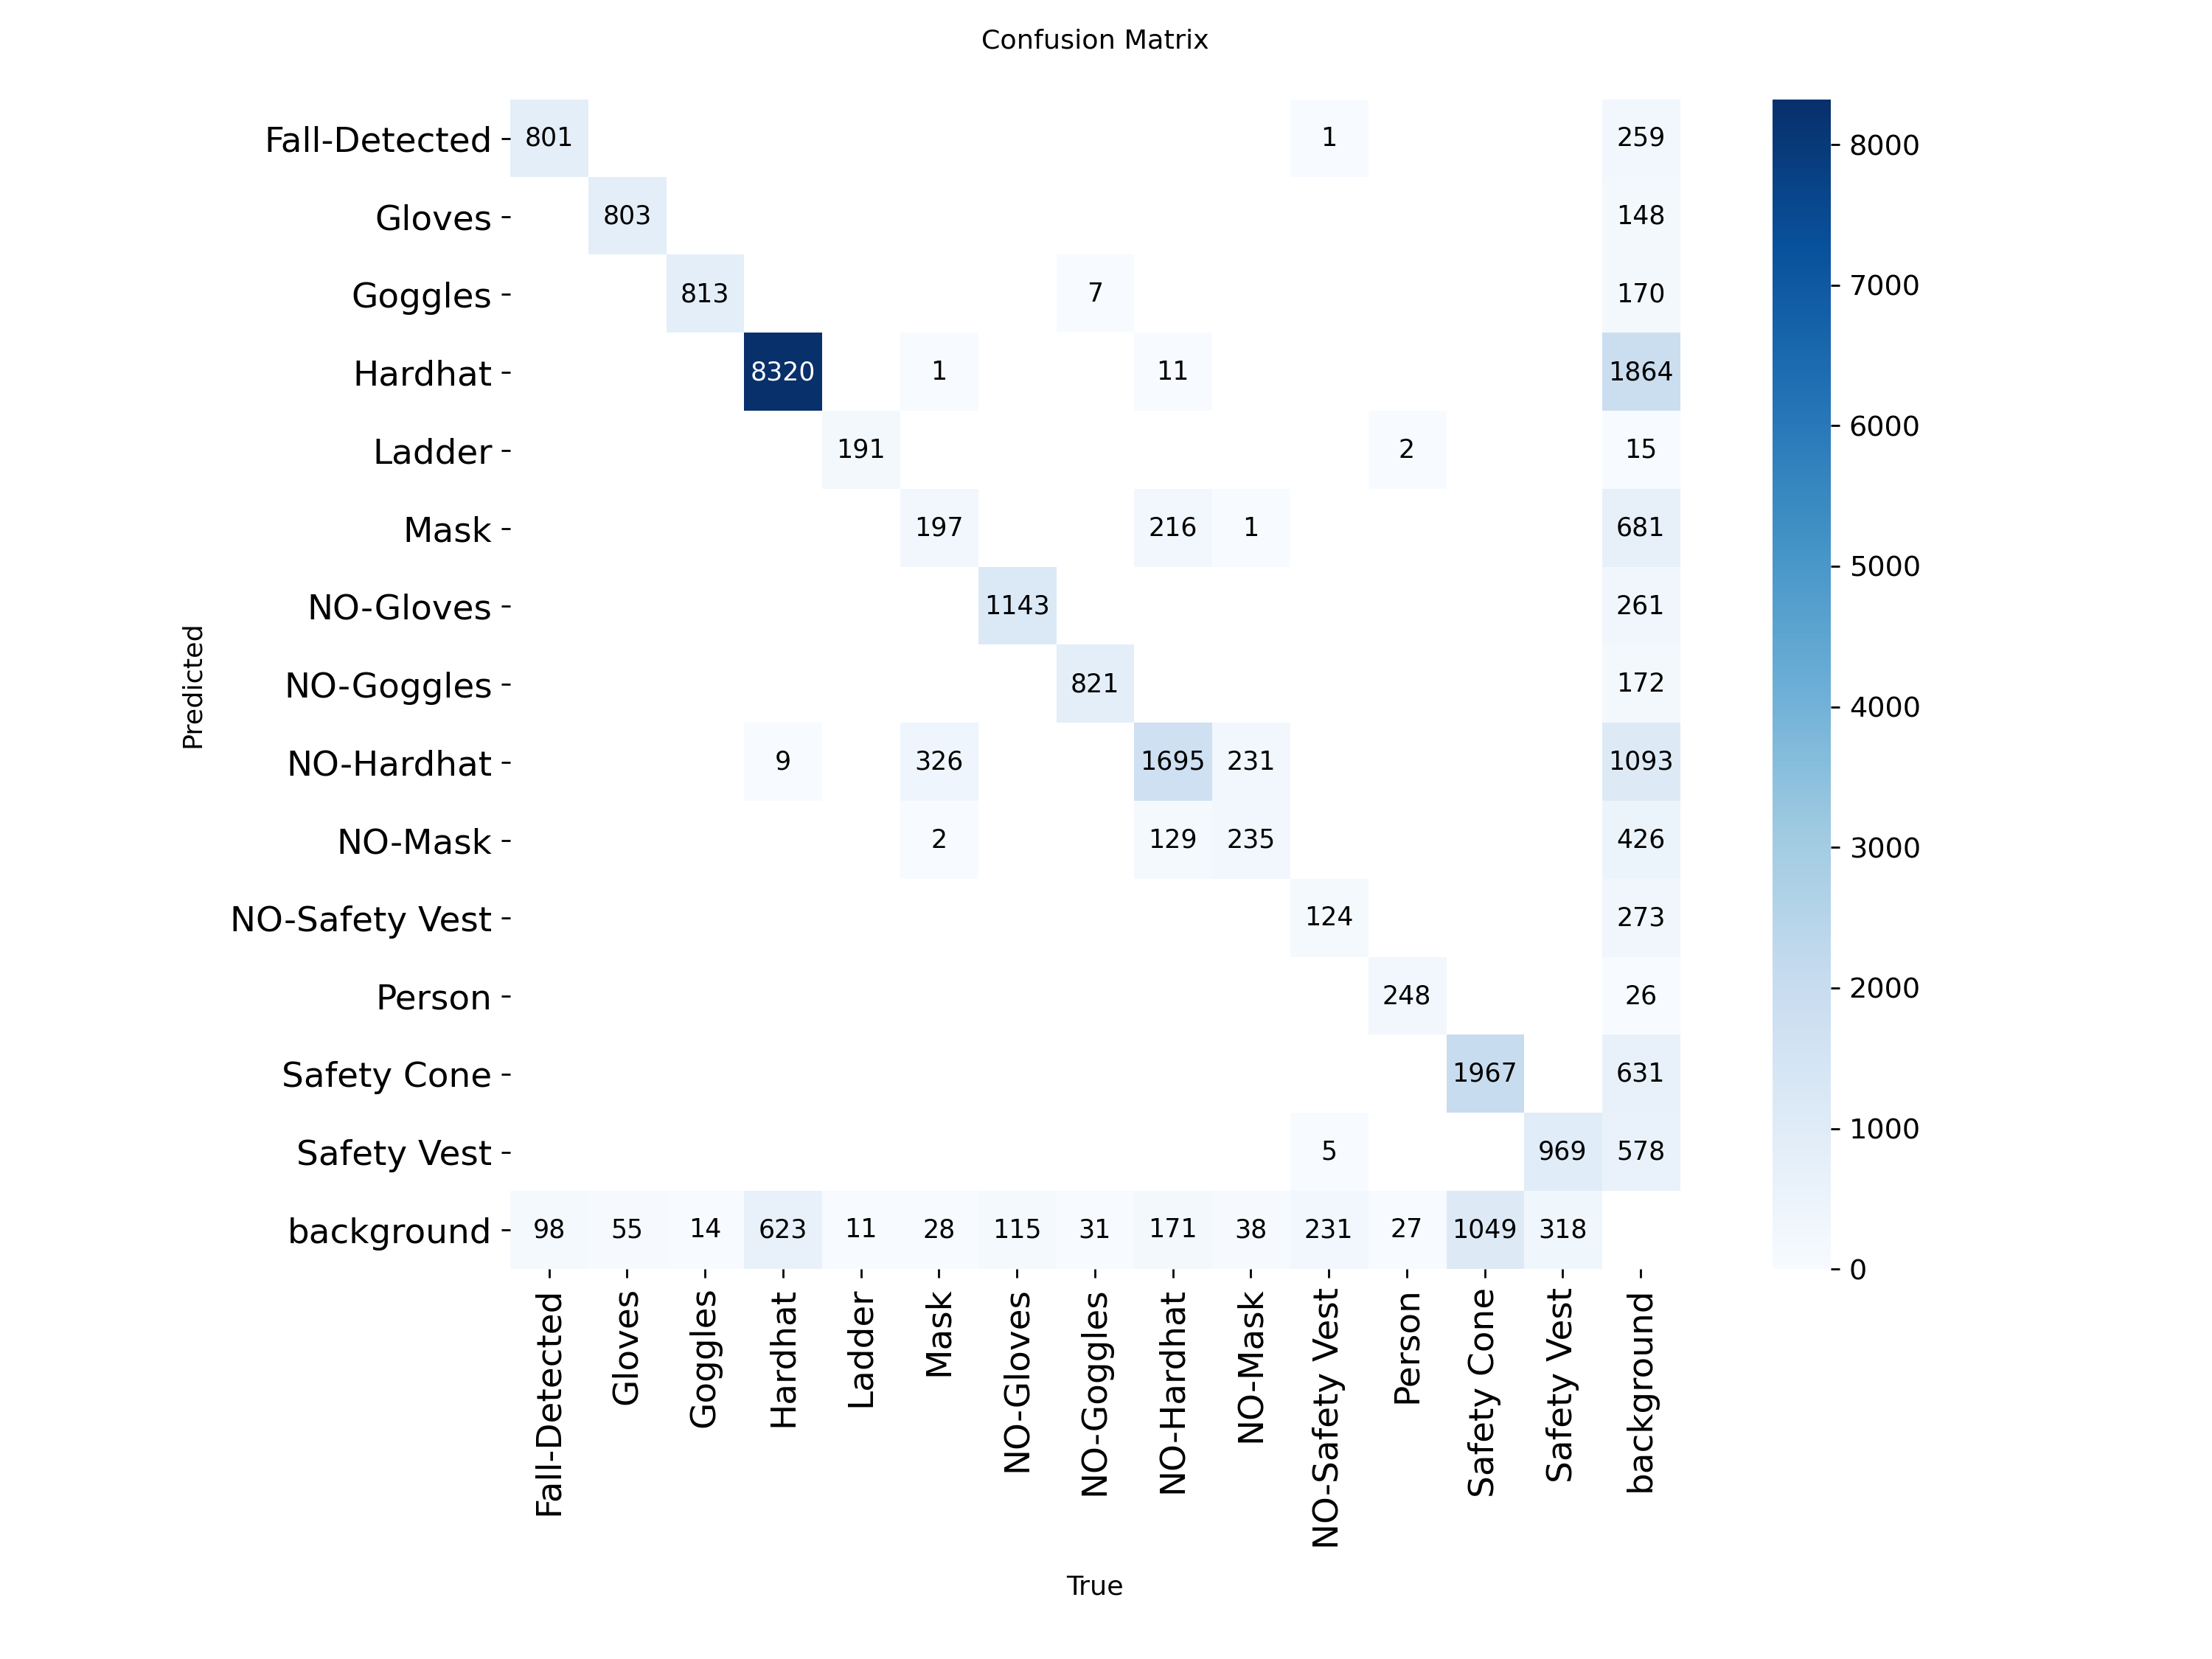

In [ ]:
from IPython.display import Image
Image(filename=f'{HOME}/runs/detect/ppe_yolo11_balanced4/confusion_matrix.png', width=800)

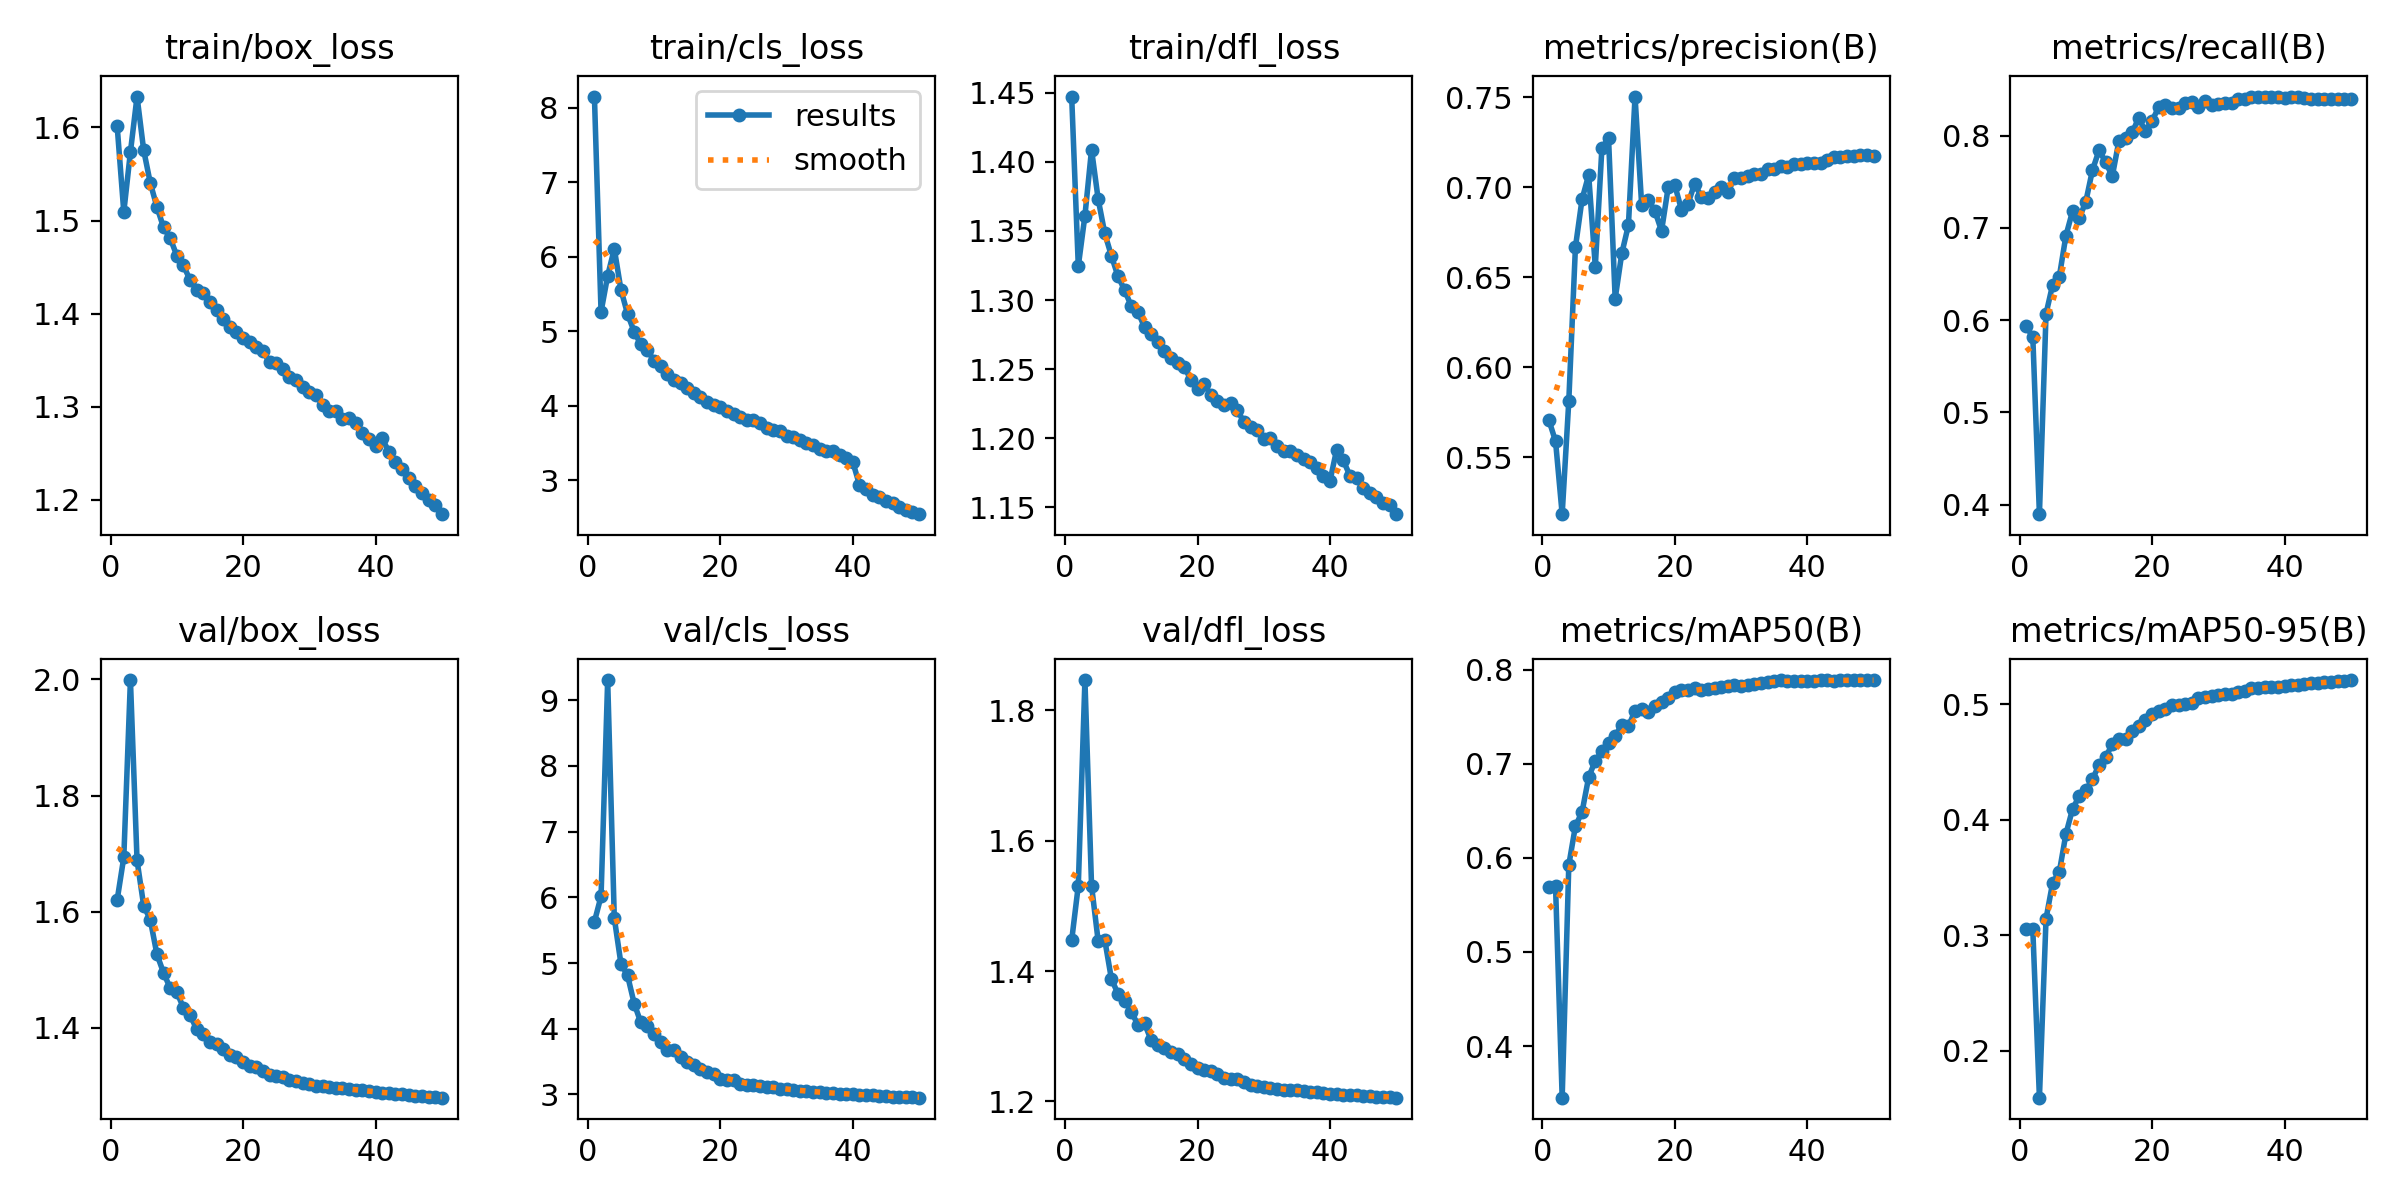

In [ ]:
Image(filename=f'{HOME}/runs/detect/ppe_yolo11_balanced4/results.png', width=800)

In [ ]:
!yolo task=detect mode=val model={HOME}/runs/detect/ppe_yolo11_balanced4/weights/best.pt data={dataset.location}/data.yaml

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLO11s summary (fused): 100 layers, 9,418,218 parameters, 0 gradients, 21.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1665.0±995.9 MB/s, size: 55.4 KB)
val: Scanning /content/datasets/Personal-Protective-Equipment---Combined-Model-7/valid/labels.cache... 8814 images, 210 backgrounds, 0 corrupt: 100% 8814/8814 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 551/551 [00:40<00:00, 13.60it/s]
                   all       8814      22077      0.717      0.841      0.789      0.521
         Fall-Detected        899        899      0.748      0.874      0.882      0.597
                Gloves        395        858      0.847       0.93      0.952      0.509
               Goggles        746        827      0.826      0.982       0.97      0.612
               Hardhat       3191       8952      0.814      0.915      0.90